In [1]:
!pip install keras -tuner # membantu mengoptimalkan parameter model machine learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 87.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.

In [2]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.6 MB/s eta 0:00:00


In [3]:
import cv2
import datetime
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers


#cnn architecture
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#keras tuner
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#transfer learning
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.xception import Xception

#warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.6 MB/s eta 0:00:00


In [5]:
#dowload dataset
#"https://drive.google.com/file/d/1-ZVSJsZFD_kymf6vfhA5oYlx8fXeZ_dN/view?usp=drive_link"
!gdown 1-ZVSJsZFD_kymf6vfhA5oYlx8fXeZ_dN

Downloading...
From: https://drive.google.com/uc?id=1-ZVSJsZFD_kymf6vfhA5oYlx8fXeZ_dN
To: /content/DATASET.zip
100% 3.75G/3.75G [00:45<00:00, 82.1MB/s]


In [6]:
#unzip dataset
%%capture
!unzip DATASET.zip;

In [7]:
BATCH_SIZE = 16
EPOCHS = 10
IM_SIZE_W = 300
IM_SIZE_H = 400

AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(10)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
for dirname, _, filenames in os.walk('/content/Curated X-Ray Dataset'):
    print(dirname)

/content/Curated X-Ray Dataset
/content/Curated X-Ray Dataset/Normal
/content/Curated X-Ray Dataset/Pneumonia-Viral
/content/Curated X-Ray Dataset/Pneumonia-Bacterial
/content/Curated X-Ray Dataset/COVID-19


In [10]:
filenames = tf.io.gfile.glob('/content/Curated X-Ray Dataset/*/*')
print(len(filenames))
filenames[:3]

9208


['/content/Curated X-Ray Dataset/COVID-19/COVID-19 (724).jpg',
 '/content/Curated X-Ray Dataset/COVID-19/COVID-19 (5).jpg',
 '/content/Curated X-Ray Dataset/COVID-19/COVID-19 (1132).jpg']

In [11]:
data = pd.DataFrame()
for el in range(0, len(filenames)):
    target = filenames[el].split('/')[-2]
    path = filenames[el]

    data.loc[el, 'filename'] = path
    data.loc[el, 'class'] = target

print(data['class'].value_counts(dropna=False))
data

Normal                 3270
Pneumonia-Bacterial    3001
Pneumonia-Viral        1656
COVID-19               1281
Name: class, dtype: int64


,filename,class
0,/content/Curated X-Ray Dataset/COVID-19/COVID-...,COVID-19
1,/content/Curated X-Ray Dataset/COVID-19/COVID-...,COVID-19
2,/content/Curated X-Ray Dataset/COVID-19/COVID-...,COVID-19
3,/content/Curated X-Ray Dataset/COVID-19/COVID-...,COVID-19
4,/content/Curated X-Ray Dataset/COVID-19/COVID-...,COVID-19
...,...,...
9203,/content/Curated X-Ray Dataset/Pneumonia-Viral...,Pneumonia-Viral
9204,/content/Curated X-Ray Dataset/Pneumonia-Viral...,Pneumonia-Viral
9205,/content/Curated X-Ray Dataset/Pneumonia-Viral...,Pneumonia-Viral
9206,/content/Curated X-Ray Dataset/Pneumonia-Viral...,Pneumonia-Viral


In [12]:
data = shuffle(data, random_state=42)
data.reset_index(drop=True, inplace=True)
data

,filename,class
0,/content/Curated X-Ray Dataset/COVID-19/COVID-...,COVID-19
1,/content/Curated X-Ray Dataset/Normal/Normal (...,Normal
2,/content/Curated X-Ray Dataset/Pneumonia-Bacte...,Pneumonia-Bacterial
3,/content/Curated X-Ray Dataset/Pneumonia-Bacte...,Pneumonia-Bacterial
4,/content/Curated X-Ray Dataset/Normal/Normal (...,Normal
...,...,...
9203,/content/Curated X-Ray Dataset/Pneumonia-Bacte...,Pneumonia-Bacterial
9204,/content/Curated X-Ray Dataset/Pneumonia-Bacte...,Pneumonia-Bacterial
9205,/content/Curated X-Ray Dataset/Pneumonia-Bacte...,Pneumonia-Bacterial
9206,/content/Curated X-Ray Dataset/COVID-19/COVID-...,COVID-19


In [13]:
change = {
'Normal' : '0',
'Pneumonia-Bacterial': '1',
'Pneumonia-Viral' : '2',
'COVID-19' : '3',
}

data['class'] = data['class'].map(change)
data

,filename,class
0,/content/Curated X-Ray Dataset/COVID-19/COVID-...,3
1,/content/Curated X-Ray Dataset/Normal/Normal (...,0
2,/content/Curated X-Ray Dataset/Pneumonia-Bacte...,1
3,/content/Curated X-Ray Dataset/Pneumonia-Bacte...,1
4,/content/Curated X-Ray Dataset/Normal/Normal (...,0
...,...,...
9203,/content/Curated X-Ray Dataset/Pneumonia-Bacte...,1
9204,/content/Curated X-Ray Dataset/Pneumonia-Bacte...,1
9205,/content/Curated X-Ray Dataset/Pneumonia-Bacte...,1
9206,/content/Curated X-Ray Dataset/COVID-19/COVID-...,3


In [14]:
indexes=[]

def func(x):
    if x[-4:] != '.jpg':
        idx = data[data['filename'] == x].index
        indexes.append(idx[0])
        print(idx[0], x)
    return x

data['filename'].map(func)

print(data.shape)
data.drop(index=indexes, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(9208, 2)
(9208, 2)


In [15]:
for el in range(100, 120):
    path = data.loc[el, 'filename']
    img  = cv2.imread(path)
    print(img.shape)

(998, 1246, 3)
(1719, 1972, 3)
(1858, 2090, 3)
(1320, 1656, 3)
(1175, 1438, 3)
(544, 904, 3)
(2074, 2380, 3)
(1024, 1376, 3)
(1377, 1748, 3)
(912, 1024, 3)
(300, 400, 3)
(812, 1072, 3)
(1758, 1804, 3)
(544, 1040, 3)
(1731, 2414, 3)
(816, 1072, 3)
(1198, 1412, 3)
(1024, 1024, 3)
(966, 1144, 3)
(300, 400, 3)


In [17]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['class'])
print(train_data['class'].value_counts(dropna=False))
print(test_data['class'].value_counts(dropna=False))

0    2616
1    2400
2    1325
3    1025
Name: class, dtype: int64
0    654
1    601
2    331
3    256
Name: class, dtype: int64


In [18]:
datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = datagen.flow_from_dataframe(train_data,
                                        x_col="filename",
                                        y_col="class",
                                        target_size=(IM_SIZE_W, IM_SIZE_H),
                                        color_mode='grayscale',
                                        batch_size=BATCH_SIZE,
                                        class_mode='categorical',
                                        shuffle=True,
                                        num_parallel_calls=AUTOTUNE)

test_gen = test_datagen.flow_from_dataframe(test_data,
                                        x_col="filename",
                                        y_col="class",
                                        target_size=(IM_SIZE_W, IM_SIZE_H),
                                        color_mode='grayscale',
                                        batch_size=BATCH_SIZE,
                                        class_mode='categorical',
                                        shuffle=False,
                                        num_parallel_calls=AUTOTUNE)

Found 7366 validated image filenames belonging to 4 classes.
Found 1842 validated image filenames belonging to 4 classes.


In [34]:
# Define CNN model
def create_model():
    with tf.device('/gpu:0'):

        # Model input
        input_layer = layers.Input(shape=(IM_SIZE_W, IM_SIZE_H, 1), name='input')

        # First block
        x = layers.Conv2D(filters=32, kernel_size=3,
                          activation='relu', padding='same',
                          name='conv2d_1')(input_layer)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_1')(x)

         # Second block
        x = layers.Conv2D(filters=64, kernel_size=3,
                          activation='relu', padding='same',
                          name='conv2d_2')(x)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_2')(x)

        # Third block
        x = layers.Conv2D(filters=128, kernel_size=3,
                          activation='relu', padding='same',
                          name='conv2d_3')(x)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_3')(x)

        # GlobalAveragePooling
        x = layers.GlobalAveragePooling2D(name='global_average_pooling2d')(x)
        x = layers.Flatten()(x)

        # Head
        x = layers.Dense(1024,activation='relu')(x)
        x = layers.Dropout(0.1, name='dropout_head_2')(x)
        x = layers.Dense(128,activation='relu')(x)

        # Output
        output = layers.Dense(units=4,
                              activation='softmax',
                              name='output')(x)


        model = Model(input_layer, output)

        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    return model

model = create_model()
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300, 400, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 400, 32)      320       
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 150, 200, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 200, 64)      18496     
                                                                 
 maxpool2d_2 (MaxPooling2D)  (None, 75, 100, 64)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 100, 128)      73856     
                                                                 
 maxpool2d_3 (MaxPooling2D)  (None, 37, 50, 128)       0   

In [20]:
init_time = datetime.datetime.now()


train_steps = train_gen.samples // BATCH_SIZE
valid_steps = test_gen.samples // BATCH_SIZE

early_stopping = EarlyStopping(monitor="val_loss", patience=8, mode="min")
checkpoint = ModelCheckpoint("loss-{val_loss:.4f}.h5", monitor="val_loss", verbose=0,
                             save_best_only=True, save_weights_only=True, mode="min")
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=4,
                                            min_lr=1e-7, verbose=1, mode="min")
history = model.fit(
    train_gen,
    validation_data=test_gen,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks=[
                checkpoint,
                early_stopping,
                learning_rate_reduction],
    verbose=1,
    )
requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

Epoch 1/10
460/460 [==============================] - 174s 349ms/step - loss: 1.1330 - accuracy: 0.5076 - val_loss: 1.1239 - val_accuracy: 0.5663 - lr: 0.0010
Epoch 2/10
460/460 [==============================] - 146s 316ms/step - loss: 0.7196 - accuracy: 0.7201 - val_loss: 0.6640 - val_accuracy: 0.7478 - lr: 0.0010
Epoch 3/10
460/460 [==============================] - 136s 296ms/step - loss: 0.6107 - accuracy: 0.7605 - val_loss: 0.5944 - val_accuracy: 0.7799 - lr: 0.0010
Epoch 4/10
460/460 [==============================] - 132s 287ms/step - loss: 0.5540 - accuracy: 0.7789 - val_loss: 0.5908 - val_accuracy: 0.7598 - lr: 0.0010
Epoch 5/10
460/460 [==============================] - 132s 288ms/step - loss: 0.5213 - accuracy: 0.7875 - val_loss: 0.5460 - val_accuracy: 0.7696 - lr: 0.0010
Epoch 6/10
460/460 [==============================] - 132s 286ms/step - loss: 0.4991 - accuracy: 0.7977 - val_loss: 0.5347 - val_accuracy: 0.8016 - lr: 0.0010
Epoch 7/10
460/460 [==========================

In [ ]:
init_time = datetime.datetime.now()


train_steps = train_gen.samples // BATCH_SIZE
valid_steps = test_gen.samples // BATCH_SIZE

early_stopping = EarlyStopping(monitor="val_loss", patience=8, mode="min")
checkpoint = ModelCheckpoint("loss-{val_loss:.4f}.h5", monitor="val_loss", verbose=0,
                             save_best_only=True, save_weights_only=True, mode="min")
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=4,
                                            min_lr=1e-7, verbose=1, mode="min")
history = model.fit(
    train_gen,
    validation_data=test_gen,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks=[
                checkpoint,
                early_stopping,
                learning_rate_reduction],
    verbose=1,
    )
requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

Epoch 1/10
460/460 [==============================] - 174s 349ms/step - loss: 1.1330 - accuracy: 0.5076 - val_loss: 1.1239 - val_accuracy: 0.5663 - lr: 0.0010
Epoch 2/10
460/460 [==============================] - 146s 316ms/step - loss: 0.7196 - accuracy: 0.7201 - val_loss: 0.6640 - val_accuracy: 0.7478 - lr: 0.0010
Epoch 3/10
460/460 [==============================] - 136s 296ms/step - loss: 0.6107 - accuracy: 0.7605 - val_loss: 0.5944 - val_accuracy: 0.7799 - lr: 0.0010
Epoch 4/10
460/460 [==============================] - 132s 287ms/step - loss: 0.5540 - accuracy: 0.7789 - val_loss: 0.5908 - val_accuracy: 0.7598 - lr: 0.0010
Epoch 5/10
460/460 [==============================] - 132s 288ms/step - loss: 0.5213 - accuracy: 0.7875 - val_loss: 0.5460 - val_accuracy: 0.7696 - lr: 0.0010
Epoch 6/10
460/460 [==============================] - 132s 286ms/step - loss: 0.4991 - accuracy: 0.7977 - val_loss: 0.5347 - val_accuracy: 0.8016 - lr: 0.0010
Epoch 7/10
460/460 [==========================

Minimum Validation Loss: 0.4312


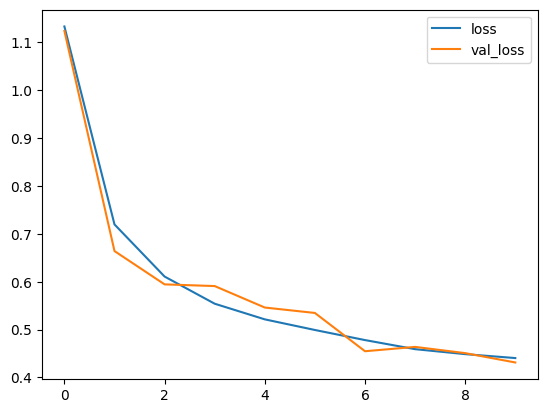

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [22]:
test_steps = test_gen.samples // BATCH_SIZE

test_loss, test_acc = model.evaluate(test_gen, steps=test_steps)
print('\naccuracy:', test_acc, 'loss: ',test_loss)

115/115 [==============================] - 24s 212ms/step - loss: 0.4312 - accuracy: 0.8152

accuracy: 0.8152173757553101 loss:  0.43124282360076904


In [23]:
predict = model.predict(test_gen, steps=test_steps)
y_hat = np.argmax(predict, axis=1)
y_hat[:20]

115/115 [==============================] - 23s 200ms/step


array([2, 1, 0, 0, 3, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2])

In [24]:
test_labels_df = pd.DataFrame()
test_labels_df[['class']] = test_data[['class']]

change = {
'0' : 0,
'1' : 1,
'2' : 2,
'3' : 3,
}

test_labels_df['class'] = test_labels_df['class'].map(change)
test_labels_df = test_labels_df[ : test_steps*BATCH_SIZE]


y_test = np.array(test_labels_df['class'])
y_test[:20]

array([1, 2, 2, 0, 3, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 0, 2])

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       654
           1       0.72      0.83      0.77       600
           2       0.61      0.43      0.50       331
           3       0.97      0.98      0.97       255

    accuracy                           0.82      1840
   macro avg       0.81      0.79      0.80      1840
weighted avg       0.81      0.82      0.81      1840
 



<Axes: >

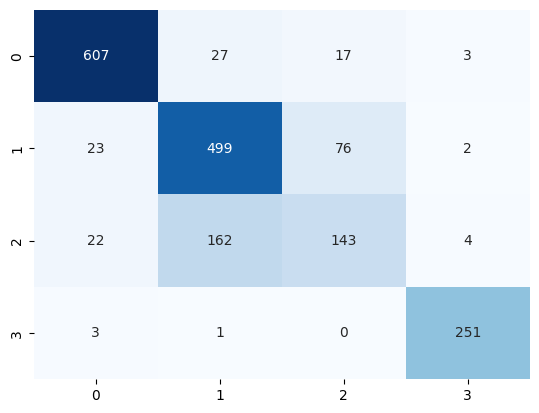

In [25]:
print(classification_report(y_test, y_hat), '\n')
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', cbar=False)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Assume you have already trained your model and have test data
# model = ...

# Predictions on the test set
y_pred = model.predict(test_gen)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# True class labels
y_true_labels = test_gen.classes

# Accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f'Accuracy: {accuracy}')

# Macro-average Recall
macro_recall = recall_score(y_true_labels, y_pred_labels, average='macro')
print(f'Macro-average Recall: {macro_recall}')

# Macro-average Precision
macro_precision = precision_score(y_true_labels, y_pred_labels, average='macro')
print(f'Macro-average Precision: {macro_precision}')

# Classification Report
class_report = classification_report(y_true_labels, y_pred_labels)
print('Classification Report:\n', class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print('Confusion Matrix:\n', conf_matrix)


116/116 [==============================] - 23s 201ms/step
Accuracy: 0.8154180238870793
Macro-average Recall: 0.7941201202917169
Macro-average Precision: 0.8057011707951174
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       654
           1       0.72      0.83      0.77       601
           2       0.61      0.43      0.50       331
           3       0.97      0.98      0.97       256

    accuracy                           0.82      1842
   macro avg       0.81      0.79      0.80      1842
weighted avg       0.81      0.82      0.81      1842

Confusion Matrix:
 [[607  27  17   3]
 [ 23 500  76   2]
 [ 22 162 143   4]
 [  3   1   0 252]]


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assume you have already trained your model and have test data
# model = ...

# Predictions on the test set
y_pred = model.predict(test_gen)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# True class labels
y_true_labels = test_gen.classes

# Accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f'Accuracy: {accuracy}')

# Micro-average Recall
micro_recall = recall_score(y_true_labels, y_pred_labels, average='micro')
print(f'Micro-average Recall: {micro_recall}')

# Micro-average Precision
micro_precision = precision_score(y_true_labels, y_pred_labels, average='micro')
print(f'Micro-average Precision: {micro_precision}')

# Classification Report
class_report = classification_report(y_true_labels, y_pred_labels)
print('Classification Report:\n', class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print('Confusion Matrix:\n', conf_matrix)



116/116 [==============================] - 29s 250ms/step
Accuracy: 0.8154180238870793
Micro-average Recall: 0.8154180238870793
Micro-average Precision: 0.8154180238870793
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       654
           1       0.72      0.83      0.77       601
           2       0.61      0.43      0.50       331
           3       0.97      0.98      0.97       256

    accuracy                           0.82      1842
   macro avg       0.81      0.79      0.80      1842
weighted avg       0.81      0.82      0.81      1842

Confusion Matrix:
 [[607  27  17   3]
 [ 23 500  76   2]
 [ 22 162 143   4]
 [  3   1   0 252]]


116/116 [==============================] - 25s 212ms/step


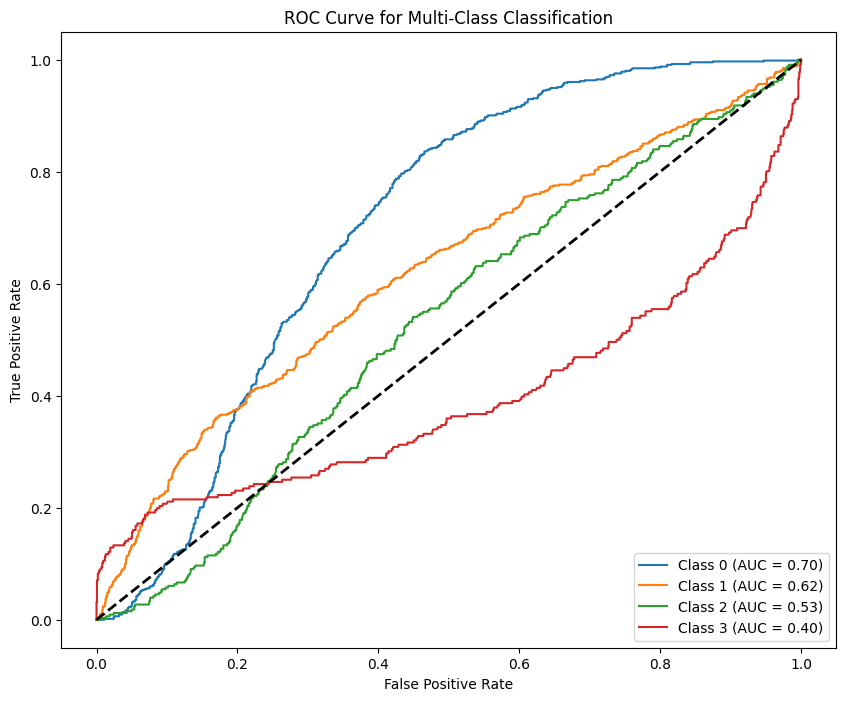

In [40]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Make predictions on the test data
y_pred = model.predict(test_gen)

# Convert true labels to binary format
y_true = label_binarize(test_gen.classes, classes=[0, 1, 2, 3])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):  # Number of classes
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))

for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

